In the previous file, we've learned how to implement a linked list. Now we'll implement the most commonly used data structures using the linked list as a base.

In this file, we'll learn what queues are and how to implement them. Then we'll use queues to implenment a process scheduling algorithm.

A queue is a data structure that is intended to work like a real queue. Think about a queue in a supermarket cash register. If we think the people in the queue as the data elements, there are two operations that we can do:

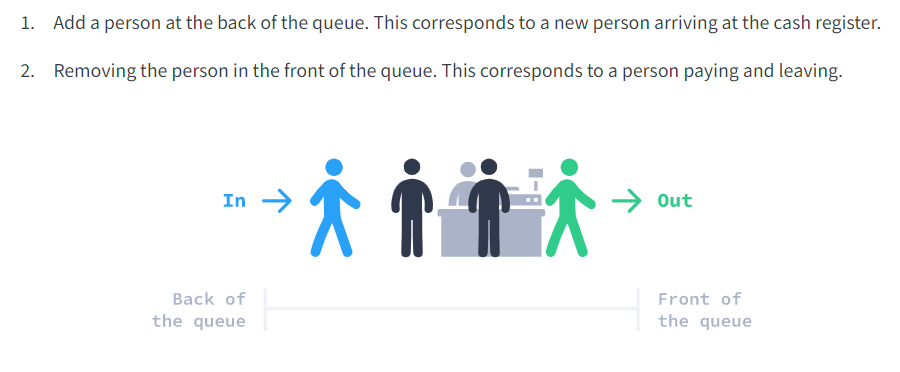

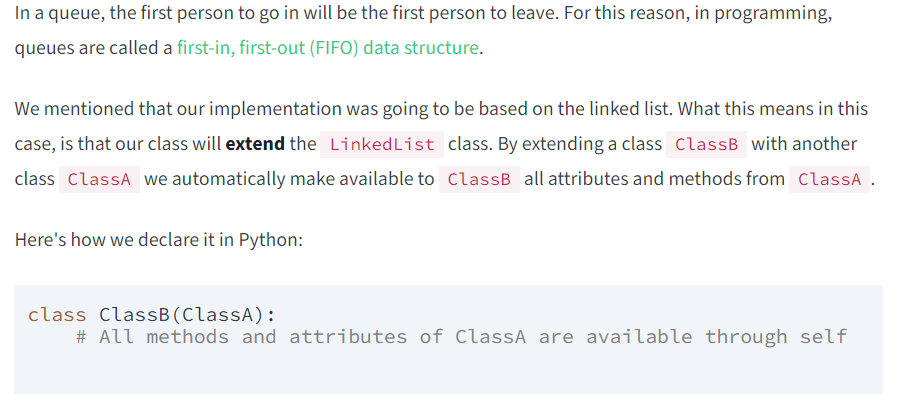

Let's define our `Queue` class and extend the `LinkedList` class.

**Task**

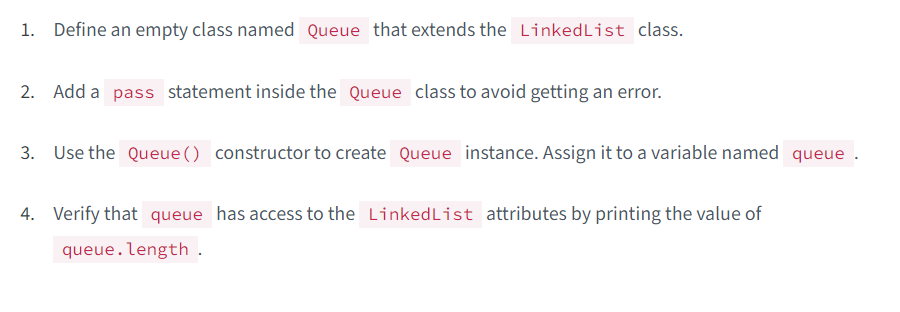

**Answer**

In [5]:
class Node:
    
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

class LinkedList:
    
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0
        
    def append(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node
        self.length += 1
        
    def __iter__(self):
        self._iter_node = self.head
        return self 
    
    def __next__(self):
        if self._iter_node is None:
            raise StopIteration
        ret = self._iter_node.data
        self._iter_node = self._iter_node.next
        return ret
    
    def prepend(self, data):
        new_node = Node(data)
        if self.length == 0:
            self.head = self.tail = new_node
        else:
            self.head.prev = new_node
            new_node.next = self.head
            self.head = new_node
        self.length += 1
        
    def __len__(self):
        return self.length
    
    def __str__(self):
        return str([value for value in self])

In [6]:
class Queue(LinkedList):
    pass

queue = Queue()
print(queue.length)

0


We mentioned above that a queue needs to support two main operations:

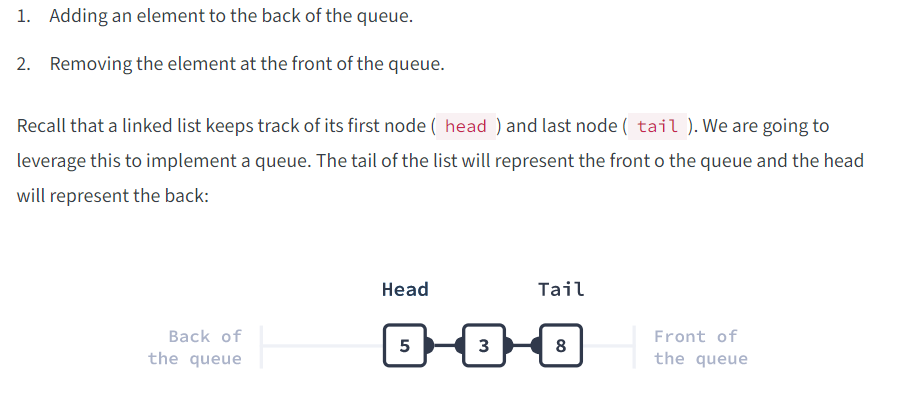

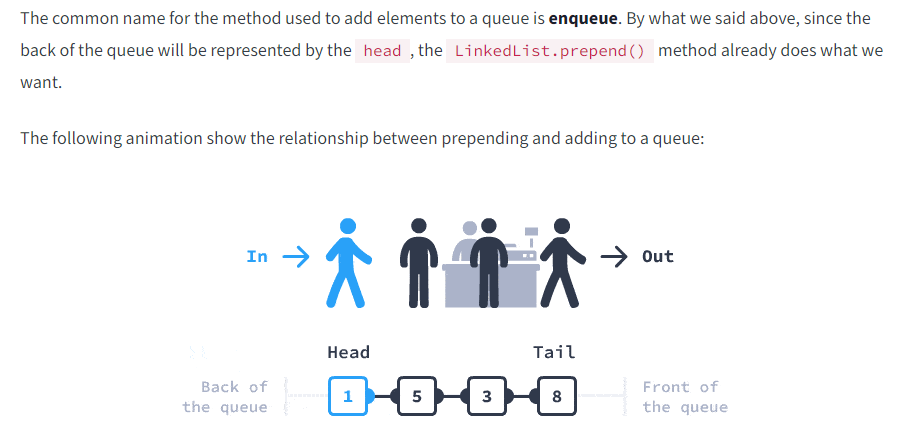

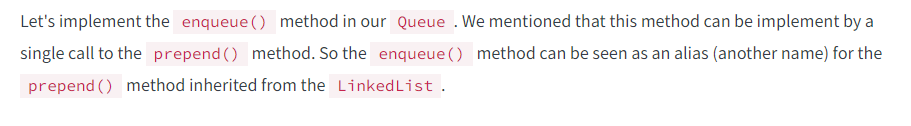

**Task**

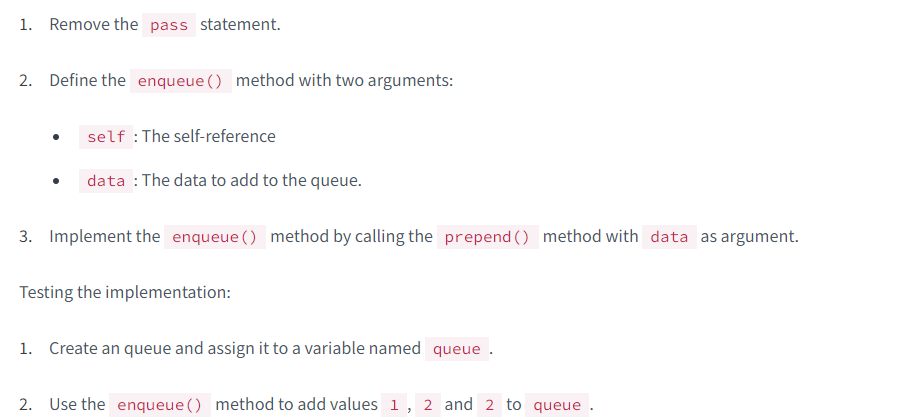

**Answer**

In [7]:
class Queue(LinkedList):
    
    def enqueue(self, data):
        self.prepend(data)

queue = Queue()
for i in [1, 2, 3]:
    queue.enqueue(i)
    
print(queue)

[3, 2, 1]


The other operation that we need to implement is removing the front element of the queue. Before we do that, let's implement a method that returns the front element but without removing it. This is also a common method that queues provide.

Above we learned that in our implementation, the front of the queue is the tail node. Therefore, to return the front of the queue we need to return the `data` attribute of the tail node.

In [8]:
from IPython.display import Image

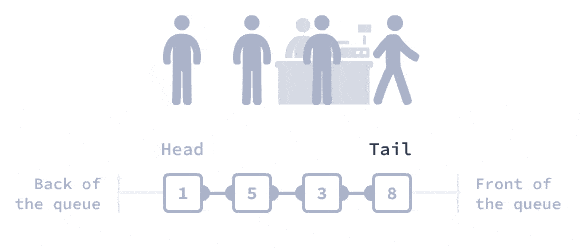

In [9]:
Image("3.1-m561.gif")

Let's implement this method.

**Task**

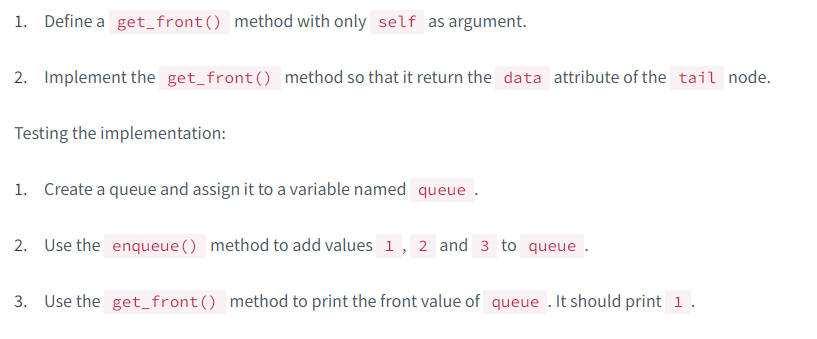

**Answer**

In [10]:
class Queue(LinkedList):
    
    def enqueue(self, data):
        self.prepend(data)
        
    # Add get_front() method here
    def get_front(self):
        return self.tail.data

queue = Queue()
for i in [1, 2, 3]:
    queue.enqueue(i)
    
print(queue.get_front())

1


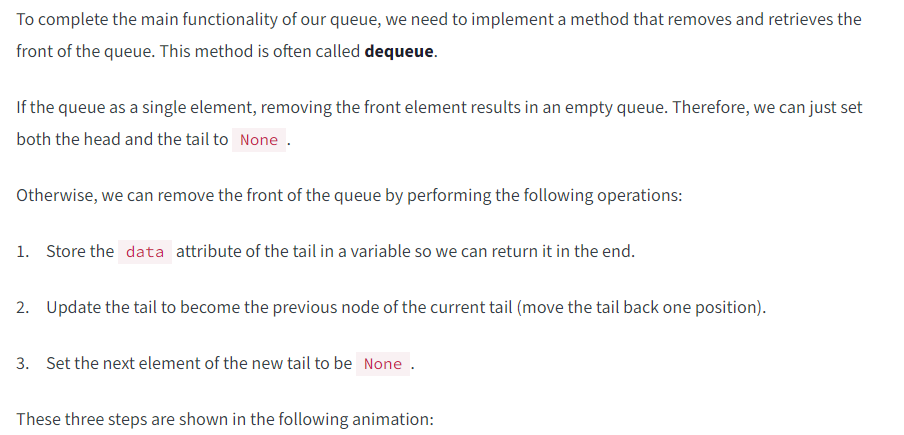

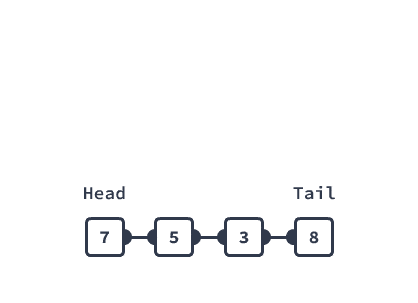

In [11]:
Image("4.1-m561.gif")

In any of these cases, we need to update the `length` attribute of the queue by decrementing it by one.

**Task**

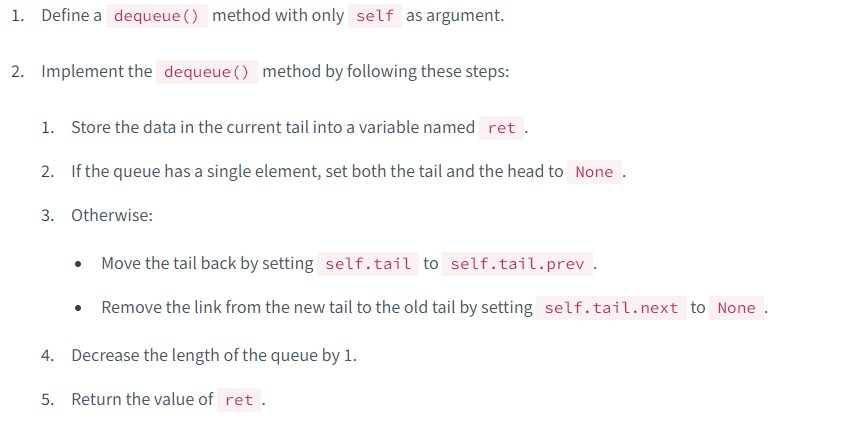

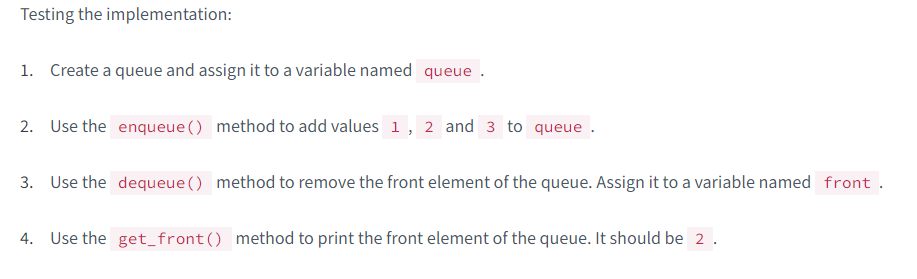

**Answer**

In [13]:
class Queue(LinkedList):
    
    def enqueue(self, data):
        self.prepend(data)
        
    def get_front(self):
        return self.tail.data
    
    # Add dequeue() method here
    def dequeue(self):
        ret = self.tail.data
        if self.length == 1:
            self.tail = self.head = None
        else:
            self.tail = self.tail.prev
            self.tail.next = None
        self.length -= 1
        return ret

queue = Queue()
for i in [1, 2, 3]:
    queue.enqueue(i)
    
front = queue.dequeue()
print(queue.get_front())

2


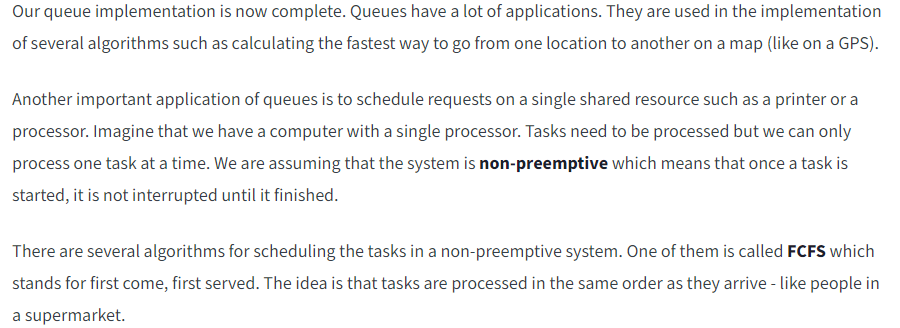

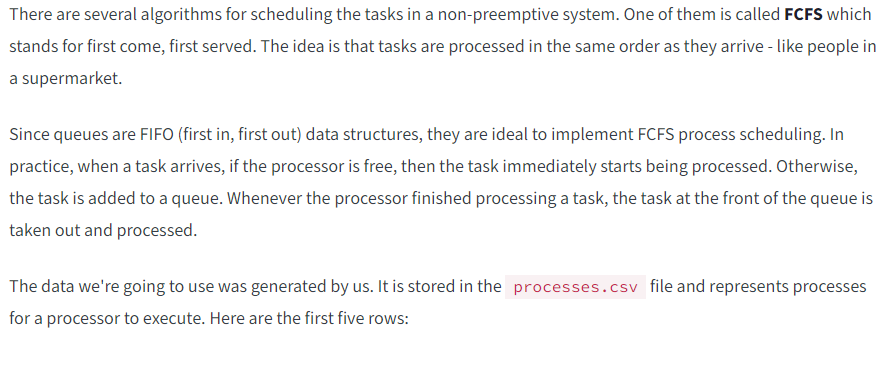

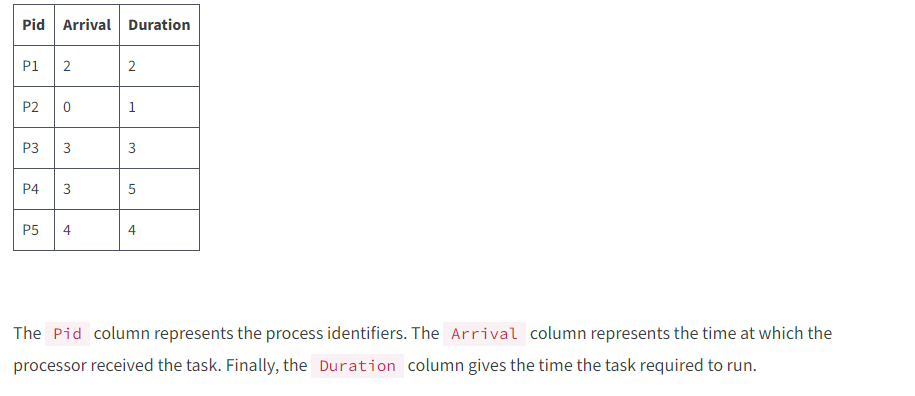

The following animation shows how the five processes aboves would be scheduled by the FCFS algorithm:

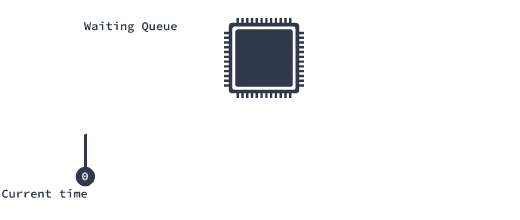

In [14]:
Image("5.1-m561.gif")

**Task**

Let's start by reading the data into a pandas DataFrame and seeing how many processes the dataset contains.

**Answer**

In [15]:
import pandas as pd
processes = pd.read_csv("processes.csv", index_col="Pid")

processes.shape

(105, 2)

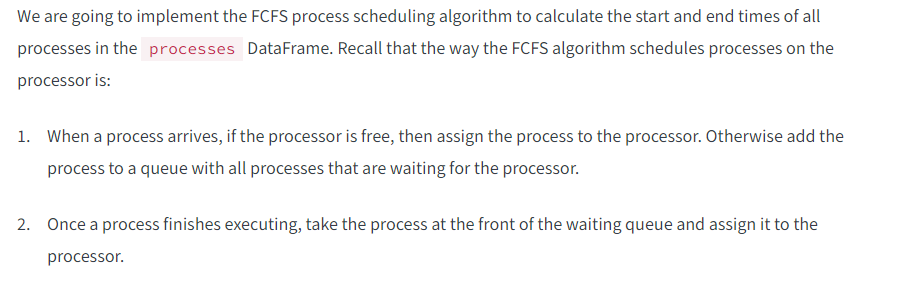

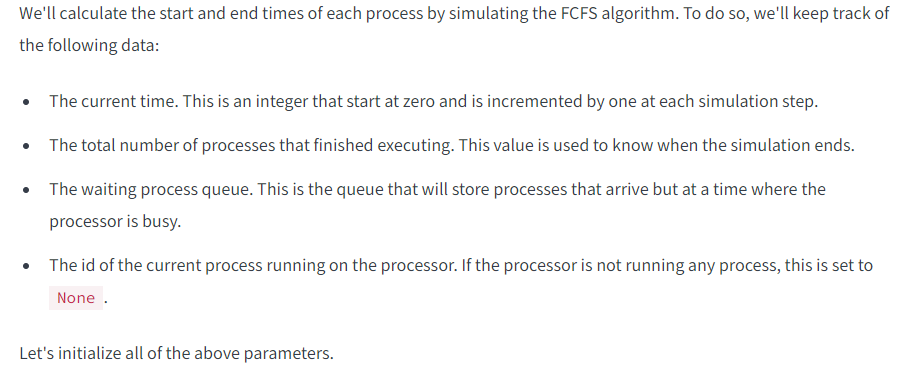

**Task**

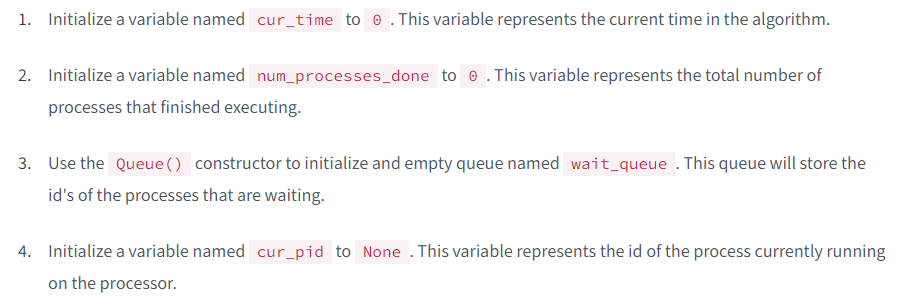

**Answer**

In [16]:
cur_time = 0
num_processes_done = 0
wait_queue = Queue()
cur_pid = None

Above we've set up all of the data we need to simulate the FCFS process scheduling algorithm.

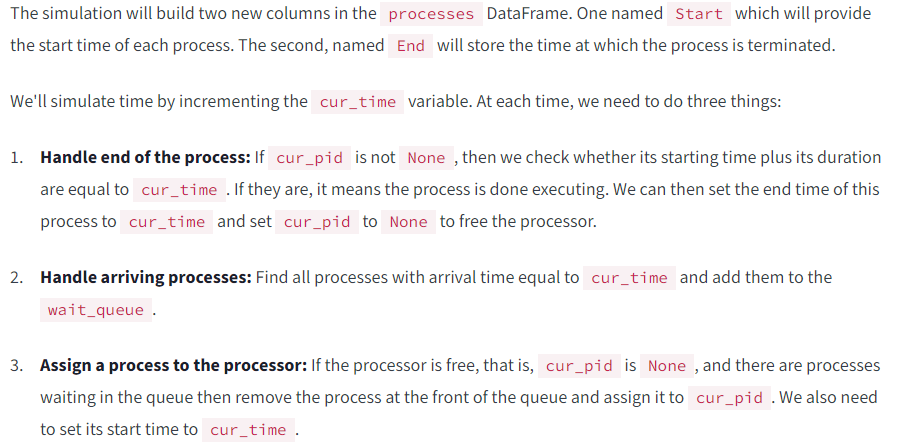

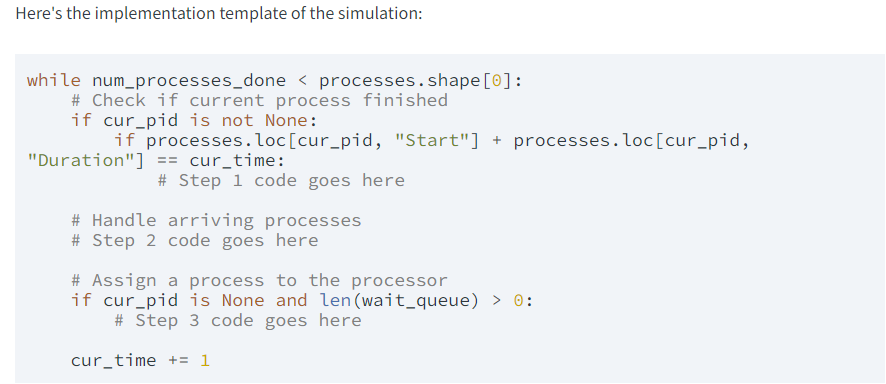

Our challenge is finish the implementation of the above algorithm. To help  check our results, here's are first five rows of the processes DataFrame at the end of the simulation:

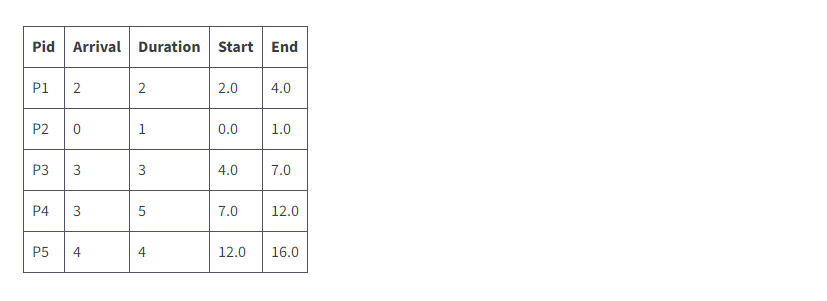

**Task**

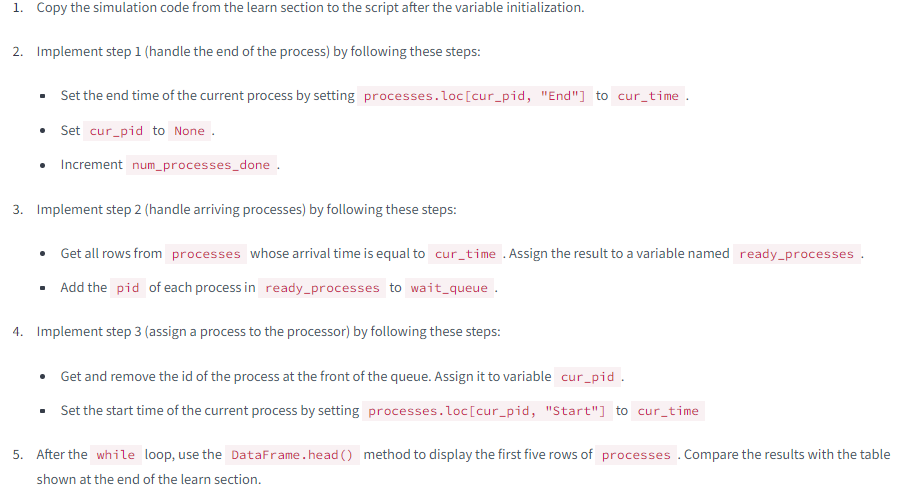

**Answer**

In [18]:
cur_time = 0
num_processes_done = 0
wait_queue = Queue()
cur_pid = None

while num_processes_done < processes.shape[0]:
    # Check if current process finished
    if cur_pid is not None:
        if processes.loc[cur_pid, "Start"] + processes.loc[cur_pid, "Duration"] == cur_time:
            # Step 1 code goes here
            processes.loc[cur_pid, "End"] = cur_time
            cur_pid = None
            num_processes_done += 1
    # Handle arriving processes
    # Step 2 code goes here
    ready_processes = processes[processes["Arrival"] == cur_time]
    for pid, _ in ready_processes.iterrows():
        wait_queue.enqueue(pid)
    # Assign a process to the processor
    if cur_pid is None and len(wait_queue) > 0:
        # Step 3 code goes here
        cur_pid = wait_queue.dequeue()
        processes.loc[cur_pid, "Start"] = cur_time 
    cur_time += 1
    
processes.head()

,Arrival,Duration,Start,End
Pid,,,,
P1,2,2,2.0,4.0
P2,0,1,0.0,1.0
P3,3,3,4.0,7.0
P4,3,5,7.0,12.0
P5,4,4,12.0,16.0


Above, we implemented the FCFS algorithm and calculated the start and end times of each process in the `processes` DataFrame.

Here are the results for the first five processes:

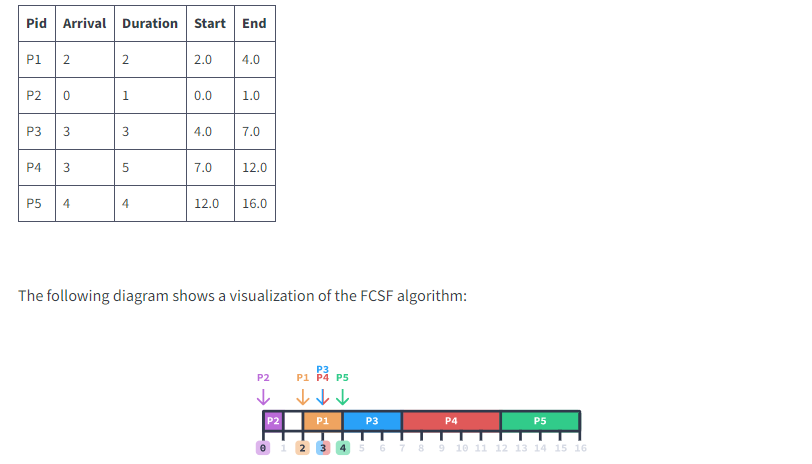

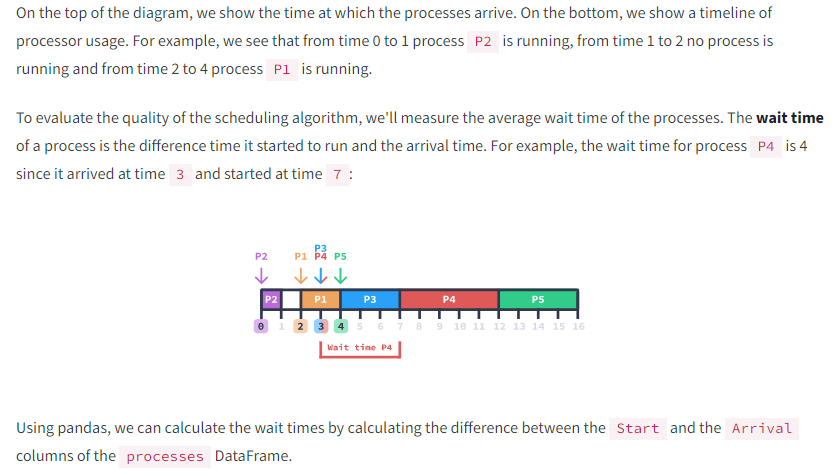

**Task**

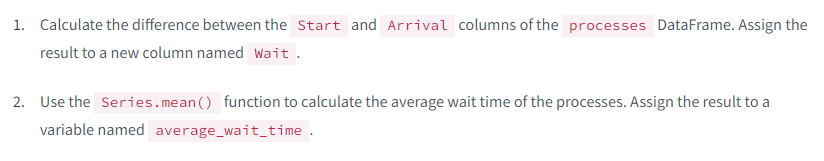

**Answer**

In [19]:
processes["Wait"] = processes["Start"] - processes["Arrival"]
average_wait_time = processes["Wait"].mean()

Above, we've calculated the average wait time of the processes. Another important metric used to evaluate scheduling algorithms in an operating system is the turnaround time.

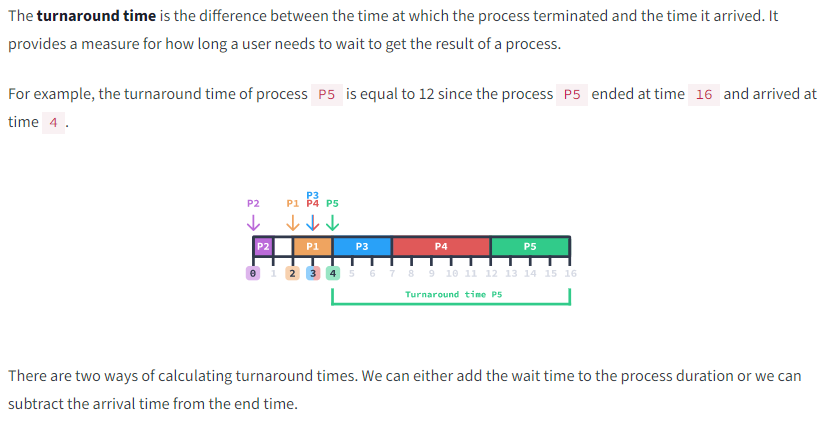

**Task**

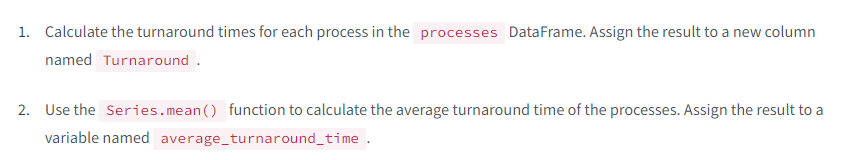

**Answer**

In [20]:
processes["Turnaround"] = processes["End"] - processes["Arrival"]
average_turnaround_time = processes["Turnaround"].mean()

In this file, we've learned how to implement a queue based on our linked list. Queues are used in a wide range of algorithms. We learned how to use the to simulate the FCFS process scheduling algorithm.

On the next file we'll learn how to implement a stack. A stack is a data structure that works in the opposite way as a queue. The last elements to be added are the first to be removed.